# smeter

This notebook:
- uses the smeter API here: https://netzeroapis.com/redoc#tag/calc-APIs/operation/smeter_calc_smeter_get
- calculates HTC values for different floor areas and annual gas consumptions
- plots the results in a figure.

## 1. Setup

In [28]:
# import packages
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
from IPython.display import Image

In [29]:
# urls
url_api = 'https://netzeroapis.com/calc/smeter'

In [30]:
# set authorization token for API
auth_token = None

## 2. Useful functions

In [31]:
# function to call the smeter api
# - accepts any keyword pairs which will be used as url parameters
def call_smeter_api(**kwargs):
    ""
    parameters = '&'.join([f'{k}={v}' for k,v in kwargs.items()])
    url = f'{url_api}?{parameters}'
    response = requests.get(
        url = url,
        headers = {'Authorization': None}
        )
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(resonse.status_code, response.text)

#
result = call_smeter_api(total_floor_area = 80)
result['calculation_result']['sap_10_output_dict']['value_39']  # the HTC value

413.46638901990246

## 3. Calculate all HTC values

In [35]:
data = {}
for total_floor_area in [50, 100, 150, 200]:
    #print(total_floor_area, end = ' ')
    for annual_gas_consumption in range(10000,21000,1000):
        print(total_floor_area, annual_gas_consumption, end = ' - ')
        result = call_smeter_api(annual_gas_consumption = annual_gas_consumption, total_floor_area = total_floor_area)
        htc = result['calculation_result']['sap_10_output_dict']['value_39']
        #print(f'<{htc}>', end = ' ')
        data.setdefault(total_floor_area, {})[annual_gas_consumption] = result
        #break
    #break
len(data)

50 10000 - 50 11000 - 50 12000 - 50 13000 - 50 14000 - 50 15000 - 50 16000 - 50 17000 - 50 18000 - 50 19000 - 50 20000 - 100 10000 - 100 11000 - 100 12000 - 100 13000 - 100 14000 - 100 15000 - 100 16000 - 100 17000 - 100 18000 - 100 19000 - 100 20000 - 150 10000 - 150 11000 - 150 12000 - 150 13000 - 150 14000 - 150 15000 - 150 16000 - 150 17000 - 150 18000 - 150 19000 - 150 20000 - 200 10000 - 200 11000 - 200 12000 - 200 13000 - 200 14000 - 200 15000 - 200 16000 - 200 17000 - 200 18000 - 200 19000 - 200 20000 - 

4

## 4. Plot figure

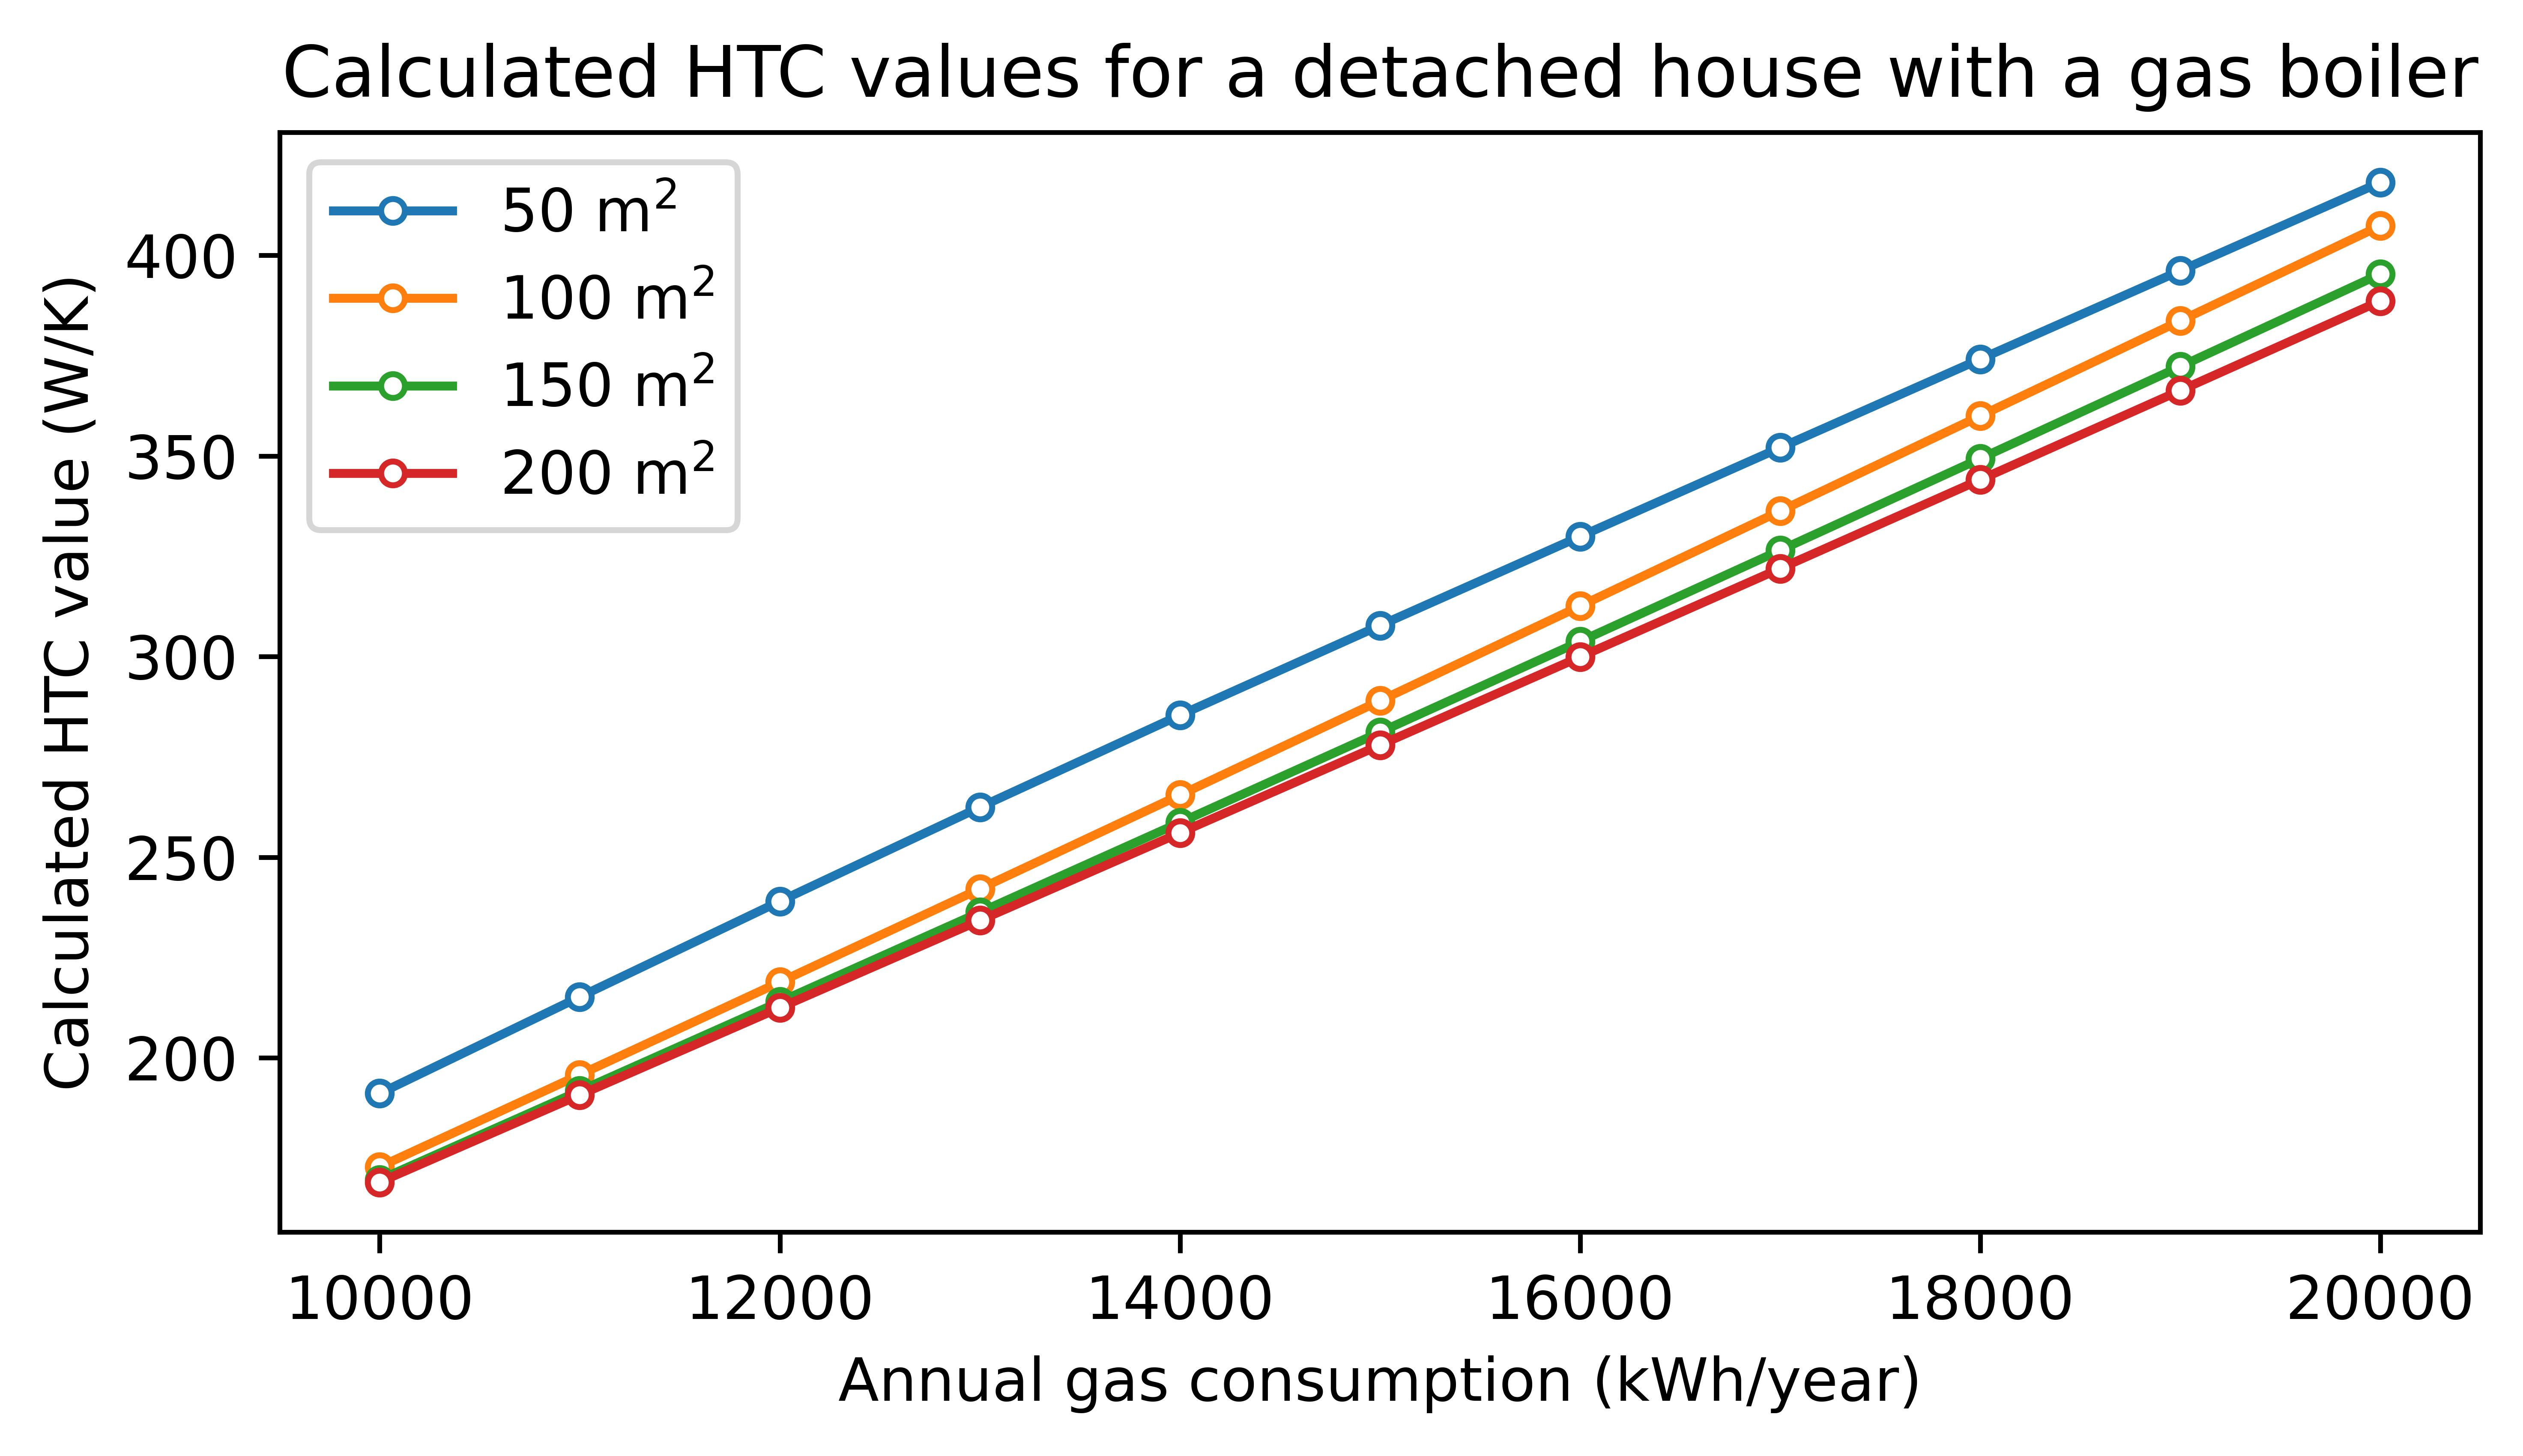

In [36]:
# main plot
fig, ax = plt.subplots(figsize = (6, 3.5), dpi = 1000)
ax.set_title('Calculated HTC values for a detached house with a gas boiler')
ax.set_xlabel('Annual gas consumption (kWh/year)')
ax.set_ylabel('Calculated HTC value (W/K)')
# plot data
for k,v in data.items():
    ax.plot(
        v.keys(), 
        [x['calculation_result']['sap_10_output_dict']['value_39'] for x in v.values()], 
        marker = 'o', markersize =4, markerfacecolor = 'white', label = f'{k} m$^2$')
ax.legend()
# add EPC bands
# ax.add_patch(patches.Rectangle((0, 81), 510, 10, linewidth = 1, facecolor = [x/256 for x in (25,180,89)]))
# ax.text(470, 84.5, 'B', color = 'white', fontsize = 25, path_effects=[pe.withStroke(linewidth=1, foreground="black")])
# ax.add_patch(patches.Rectangle((0, 69), 510, 12, linewidth = 1, facecolor = [x/256 for x in (141,206,70)]))
# ax.text(470, 73.5, 'C', color = 'white', fontsize = 25, path_effects=[pe.withStroke(linewidth=1, foreground="black")])
# ax.add_patch(patches.Rectangle((0, 55), 510, 14, linewidth = 1, facecolor = [x/256 for x in (255,213,0)]))
# ax.text(470, 62, 'D', color = 'white', fontsize = 25, path_effects=[pe.withStroke(linewidth=1, foreground="black")])
# save figure
fig.tight_layout()
for fmt in ['jpeg', 'png']:
    fig.savefig(f'smeter.{fmt}', format = fmt, bbox_inches='tight')
plt.close()
display(Image(filename=f'smeter.jpeg', width = 800, height = 800 * 1 ) )